# <font size = 5>Лабораторная работа 2: алгоритмы кластерного анализа</font>

Цель работы: выполнить кластерный анализ данных. Провести сравнение различных алгоритмов кластеризации.  Объяснить результаты. 


Данные: представляют собой векторы-строки в пространстве R4. 


In [1]:
import pandas as pd #импортируем библиотеки
import numpy as np  #
import networkx as nx
import matplotlib.pyplot as plt   #
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
import matplotlib as plt
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
from matplotlib import pyplot

import matplotlib.patches as mpatches #
from math import sqrt  #

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import scipy.cluster.hierarchy as sch 
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

import warnings
warnings.simplefilter('ignore')

# Данные. Первичная обработка

Подготовка данных: для каждого набора данных X_4 и  Y_4  выбрать расстояние в R4 
- вычислить матрицу расстояний 
- перейти к матрице близостей (similarity matrix) и построить графовую модель данных (полный, неориентированный, простой взвешенный граф)


In [2]:
df_x = pd.read_excel('D:\Data/X_4_9.xlsx')
df_y = pd.read_excel('D:\Data/Y_4_9.xlsx')

Чтобы познакомиться, построим гистограммы наборов данных

<Figure size 720x720 with 0 Axes>

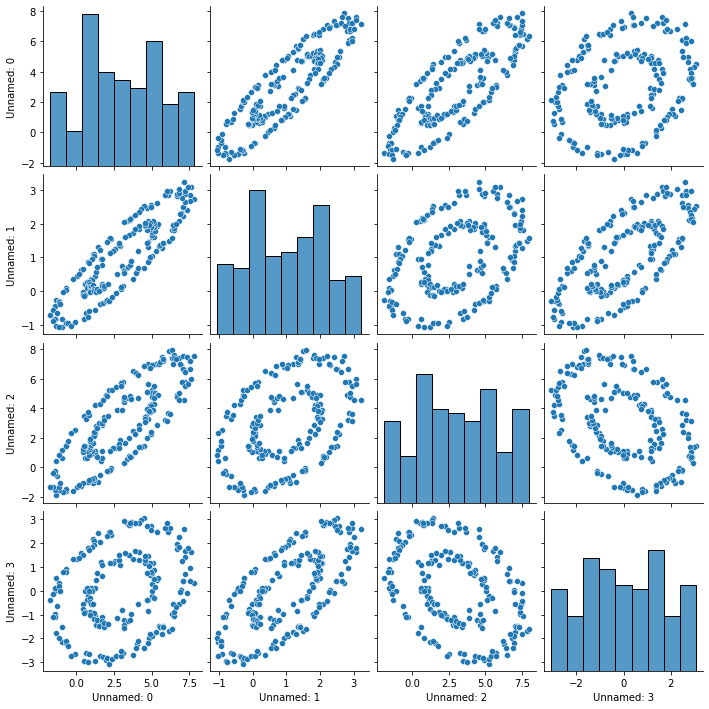

In [3]:
plt.figure(figsize=(10,10))  
sns.pairplot(df_x, diag_kind = "hist")
plt.show()

<Figure size 720x720 with 0 Axes>

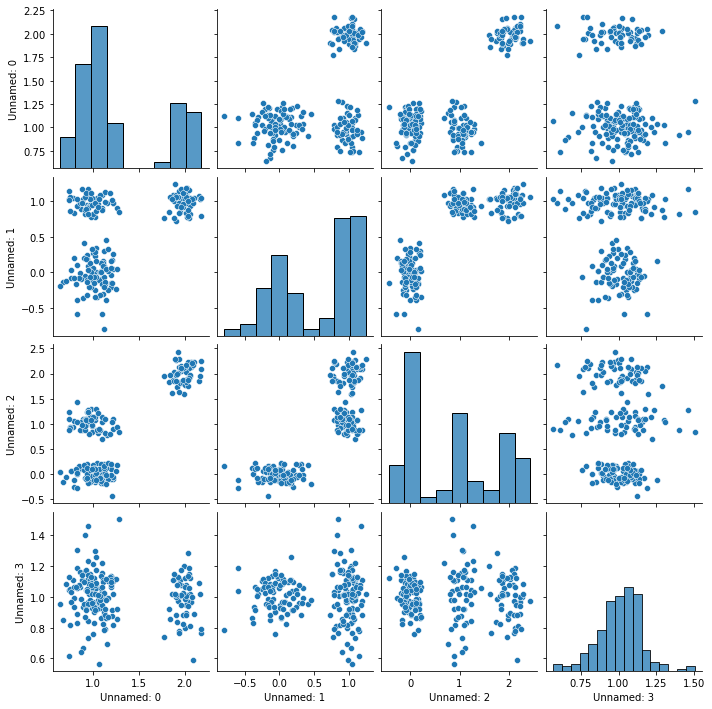

In [4]:
plt.figure(figsize=(10,10))
sns.pairplot(df_y, diag_kind = "hist")
plt.show()

In [5]:
X = np.array(df_x)
Y = np.array(df_y)

Вычислим матрицу евклидового расстояния для каждого набора данных 

In [6]:
euc_X = euclidean_distances(X, X)
print(euc_X)

[[0.         0.27260639 0.65505009 ... 0.92994913 0.28639027 0.22116976]
 [0.27260639 0.         0.75130324 ... 1.03110943 0.38993548 0.47708832]
 [0.65505009 0.75130324 0.         ... 1.5513974  0.37859171 0.5405506 ]
 ...
 [0.92994913 1.03110943 1.5513974  ... 0.         1.2110615  1.0130535 ]
 [0.28639027 0.38993548 0.37859171 ... 1.2110615  0.         0.26559903]
 [0.22116976 0.47708832 0.5405506  ... 1.0130535  0.26559903 0.        ]]


In [7]:
euc_Y = euclidean_distances(Y, Y)
print(euc_Y)

[[0.         0.46586763 2.12850775 ... 2.00394661 2.34996027 0.65633819]
 [0.46586763 0.         2.30717748 ... 2.16370624 2.47072076 0.3721138 ]
 [2.12850775 2.30717748 0.         ... 0.21634535 0.48645626 2.64910286]
 ...
 [2.00394661 2.16370624 0.21634535 ... 0.         0.41885914 2.50081925]
 [2.34996027 2.47072076 0.48645626 ... 0.41885914 0.         2.80096881]
 [0.65633819 0.3721138  2.64910286 ... 2.50081925 2.80096881 0.        ]]


Перейдем к матрице близостей или матрице косинусного сходства (cosine similarity matrix) для каждого набора данных

In [8]:
sim_x = cosine_similarity(euc_X)
print(sim_x)

[[1.         0.999883   0.99823386 ... 0.99604121 0.99967064 0.99983962]
 [0.999883   1.         0.99775903 ... 0.99638875 0.99942184 0.99950553]
 [0.99823386 0.99775903 1.         ... 0.98949243 0.99940712 0.99896275]
 ...
 [0.99604121 0.99638875 0.98949243 ... 1.         0.99357575 0.99474459]
 [0.99967064 0.99942184 0.99940712 ... 0.99357575 1.         0.99987477]
 [0.99983962 0.99950553 0.99896275 ... 0.99474459 0.99987477 1.        ]]


In [9]:
sim_y = cosine_similarity(euc_Y)
print(sim_y)

[[1.         0.99637928 0.49117305 ... 0.5051166  0.49045212 0.99690759]
 [0.99637928 1.         0.44034628 ... 0.45405392 0.43993125 0.99856459]
 [0.49117305 0.44034628 1.         ... 0.99784392 0.99560949 0.46449303]
 ...
 [0.5051166  0.45405392 0.99784392 ... 1.         0.9977721  0.47774111]
 [0.49045212 0.43993125 0.99560949 ... 0.9977721  1.         0.46444684]
 [0.99690759 0.99856459 0.46449303 ... 0.47774111 0.46444684 1.        ]]


Построим тепловую карту близости по матрицам sim_x и sim_y. Где цвет светлее, там больше близость между объектами

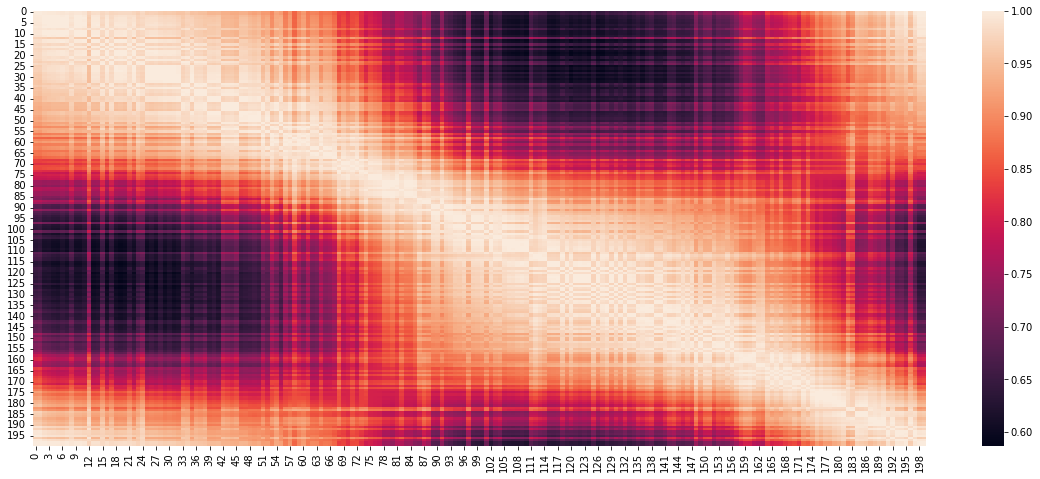

In [10]:
plt.figure(1, figsize = (20 ,8))
sns.heatmap(sim_x)
plt.show()

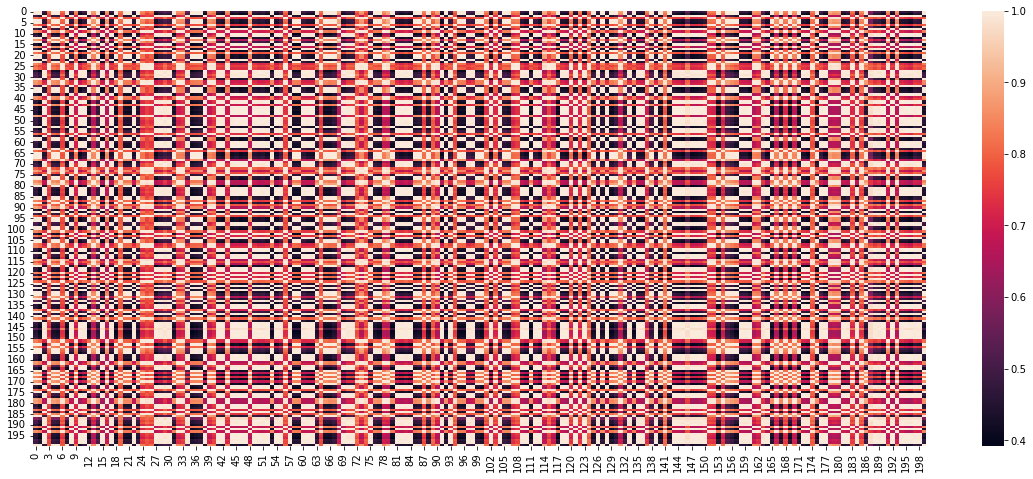

In [11]:
plt.figure(1, figsize = (20 ,8))
sns.heatmap(sim_y)
plt.show()

Используя матрицу близостей, построим графовую модель данных (полный, неориентированный, простой взвешенный граф)

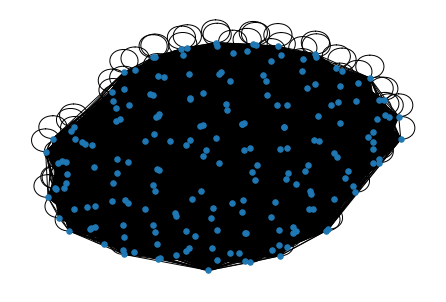

In [12]:
G_X = nx.to_networkx_graph(sim_y)
nx.draw(G_X, with_labels=False, node_size=30, arrows=False)

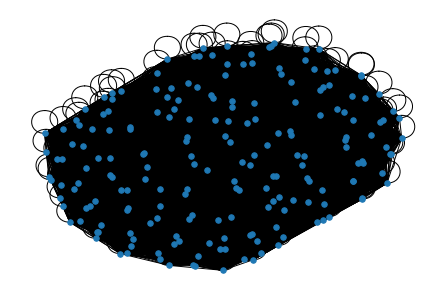

In [13]:
G_Y = nx.to_networkx_graph(sim_y)
nx.draw(G_Y, with_labels=False, node_size=30, arrows=False)

Как мы видим, оба графа получились неинформативными и очень плотными из за большого количества узлов и связей. Построим первые 5 вершин графов.

In [14]:
G_X5 = nx.from_numpy_matrix(euc_X)
G_X5.remove_edges_from(nx.selfloop_edges(G_X5))
G_Y5 = nx.from_numpy_matrix(euc_Y)
G_Y5.remove_edges_from(nx.selfloop_edges(G_Y5))

In [15]:
graph_for_plot = nx.subgraph(G_X5, list(G_X5.nodes)[:5])

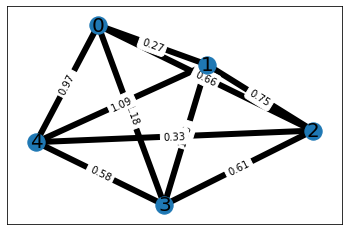

In [16]:
pos = nx.spring_layout(graph_for_plot, seed = 7)
nx.draw_networkx_nodes(graph_for_plot, pos, node_size=300)
nx.draw_networkx_labels(graph_for_plot, pos, font_size=20, font_family="sans-serif")
nx.draw_networkx_edges(graph_for_plot, pos, edgelist=graph_for_plot.edges, width=6)
labels = nx.get_edge_attributes(graph_for_plot, 'weight')
labels = {k: round(v, 2) for k, v in labels.items()}
nx.draw_networkx_edge_labels(graph_for_plot, pos, labels)
plt.show()

In [17]:
graph_for_plot_y = nx.subgraph(G_Y5, list(G_Y5.nodes)[:5])

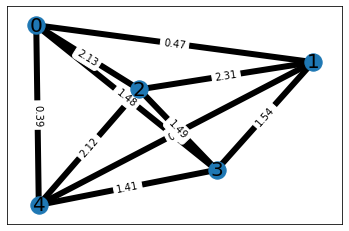

In [18]:
pos = nx.spring_layout(graph_for_plot_y, seed = 7)
nx.draw_networkx_nodes(graph_for_plot_y, pos, node_size=300)
nx.draw_networkx_labels(graph_for_plot_y, pos, font_size=20, font_family="sans-serif")
nx.draw_networkx_edges(graph_for_plot_y, pos, edgelist=graph_for_plot_y.edges, width=6)
labels = nx.get_edge_attributes(graph_for_plot_y, 'weight')
labels = {k: round(v, 2) for k, v in labels.items()}
nx.draw_networkx_edge_labels(graph_for_plot_y, pos, labels)
plt.show()

# 1. Кластеризация для числа кластеров k=2


## 1.1 Найдем разбиение каждого набора данных на 2 кластера с помощью следующих алгоритмов:
- k-means
- EM алгоритм
- MST method
- Spectral algorithm


## k-means


Подготовим данные для дальнейшей кластеризации, для этого выполним процедуру нормирования

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X)
Y_norm = StandardScaler().fit_transform(Y)

sklearn.cluster.KMeans

По умолчанию инициализация ‘k-means ++’ выбирает начальные центроиды кластера, используя выборку на основе эмпирического распределения вероятностей вклада точек в общую инерцию. Этот метод ускоряет конвергенцию. Реализованный алгоритм называется “жадный k-means ++”. Он отличается тем, что на каждом этапе выборки выполняется несколько испытаний и выбирается наилучший центроид среди них. n_clusters - количество центров.
Методом подбора было установлено, что лучшую проекцию на плоскость дают первая и последняя координата.

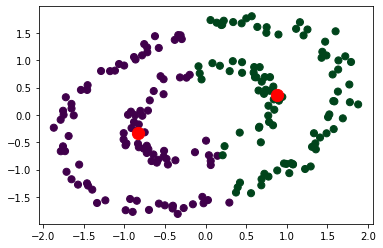

In [20]:
x_kmeans2 = KMeans(n_clusters= 2, init='k-means++')
pred_x = x_kmeans2.fit_predict(X_norm)
plt.scatter(X_norm[:,0], X_norm[:,3], c=pred_x, s=50, cmap='PRGn')
plt.scatter(x_kmeans2.cluster_centers_[:, 0], x_kmeans2.cluster_centers_[:, 3], s=150, c='red')
plt.show()

Повторим все тоже самое для набора данных Y.  Если взять первую и вторую координату, то на плоскость проекция будет выглядеть следующим образом:

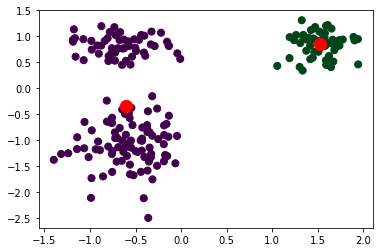

In [21]:
y_kmeans2 = KMeans(n_clusters= 2, init='k-means++')
pred_y = y_kmeans2.fit_predict(Y_norm)
plt.scatter(Y_norm[:,0], Y_norm[:,1], c=pred_y, s=50, cmap='PRGn')
plt.scatter(y_kmeans2.cluster_centers_[:, 0], y_kmeans2.cluster_centers_[:, 1], s=150, c='red')
plt.show()

Интересен случай, если для проекции взять первую и последнюю координату:

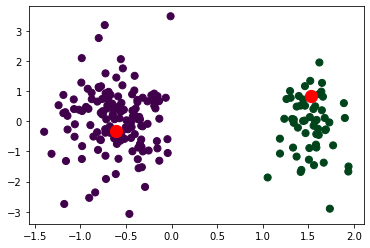

In [22]:
plt.scatter(Y_norm[:,0], Y_norm[:,3], c=pred_y, s=50, cmap='PRGn')
plt.scatter(y_kmeans2.cluster_centers_[:, 0], y_kmeans2.cluster_centers_[:, 1], s=150, c='red')
plt.show()

По данному методу визуально сделать выводы о качестве разбиения данных на кластеры сложно. Необходимо использовать другие методы.

## EM-алгоритм

sklearn.mixture.GaussianMixture

covariance_type, по умолчанию=’полный’ - каждый компонент имеет свою собственную общую ковариационную матрицу. Порог сходимости 1e-3. Количество итераций EM для выполнения по умолчанию 100.
Для набора X проекция на плоскость первой и четвертой координаты.

In [23]:
x_em2 = GaussianMixture(n_components=2)
x_cluster_em = x_em2.fit_predict(X_norm)
pred_x = x_em2.fit_predict(X_norm)
label_=x_em2
x_em2.means_  # GaussianMixture

array([[ 0.84224552,  0.80700882,  0.58101994,  0.34498607],
       [-0.81854201, -0.78429699, -0.56466816, -0.33527705]])

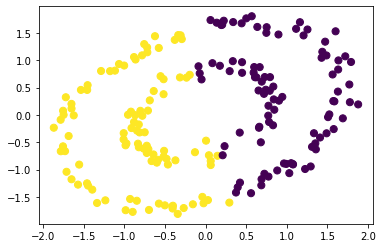

In [24]:
plt.scatter(X_norm[:, 0], X_norm[:, 3], c=pred_x, s=50, cmap='viridis')

Повторим все тоже самое для набора данных Y.  Если взять первую и вторую координату, на плоскость проекция будет выглядеть следующим образом:

In [25]:
y_em2 = GaussianMixture(n_components=2)
y_cluster_em = y_em2.fit_predict(Y_norm)

y_em2.means_ # GaussianMixture

array([[ 1.524559  ,  0.84806324,  1.34366649, -0.13481428],
       [-0.60769135, -0.3380392 , -0.53558734,  0.05373716]])

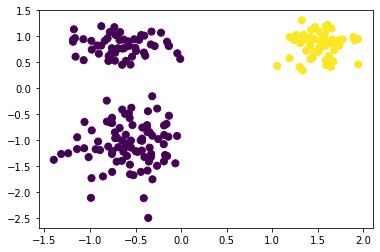

In [26]:
plt.scatter(Y_norm[:, 0], Y_norm[:, 1], c=pred_y, s=50, cmap='viridis')

Рассмотрим, если для проекции взять первую и последнюю координату:

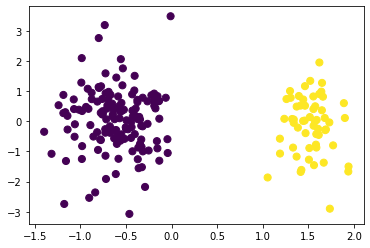

In [27]:
labels = y_em2.predict(Y_norm)
plt.scatter(Y_norm[:, 0], Y_norm[:, 3], c=pred_y, s=50, cmap='viridis')

## MST metod

Реализация данного метода описана тут: https://github.com/jakevdp/mst_clustering/blob/master/MSTClustering.ipynb

Для набора X проекция на плоскость первой и четвертой координаты. Пороговое значение для разбиения на 2 кластера 1.2 (подбиралось вручную). Построим графы на плоскости

In [28]:
from mst_clustering import MSTClustering

def plot_mst(model, cmap='bwr'):
    """Utility code to visualize a minimum spanning tree"""
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[3], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 3], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree (X)', size=16)
    ax[1].set_title('MST metod (X)', size=16);


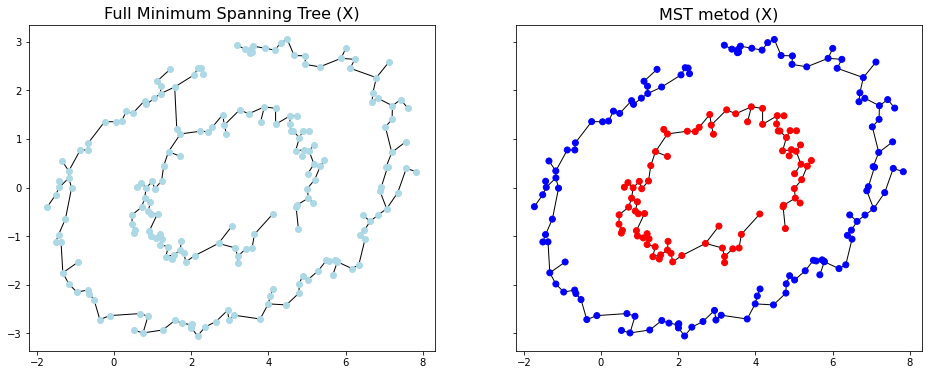

In [29]:
MST_x2 = MSTClustering(cutoff_scale=1.2)
MST_x2.fit(X)
plot_mst(MST_x2)

Для набора Y проекция на плоскость первой и второй координаты. Пороговое значение для разбиения на 2 кластера 1.8 (подбиралось вручную). 

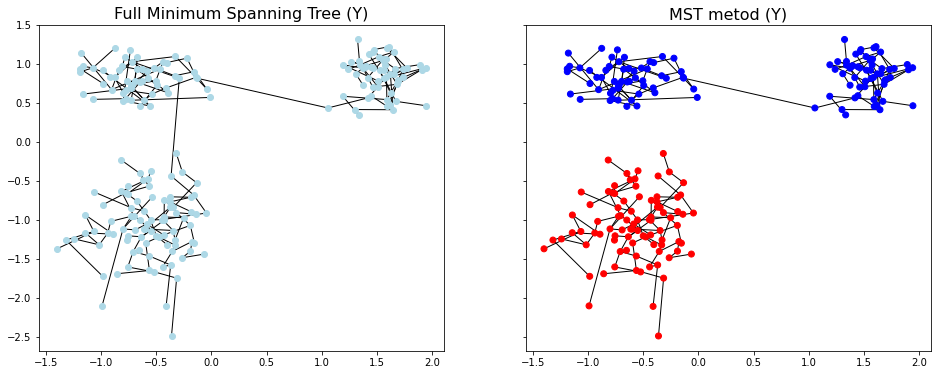

In [30]:
from mst_clustering import MSTClustering

def plot_mst_y2(model, cmap='bwr'):
    """Utility code to visualize a minimum spanning tree"""
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[1], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree (Y)', size=16)
    ax[1].set_title('MST metod (Y)', size=16);
    
MST_y2 = MSTClustering(cutoff_scale=1.8)
MST_y2.fit(Y_norm)
plot_mst_y2(MST_y2)

## Spectral algorithm

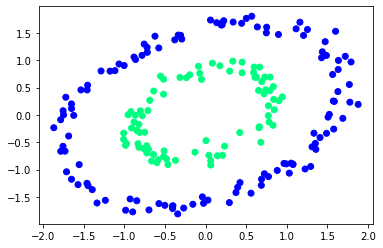

In [31]:
from sklearn.cluster import SpectralClustering

# параметр‘nearest_neighbors’означает построение матрицы сходства путем вычисления графа ближайших соседей. 
# количество соседей, используемых при построении по умолчанию 10
# Для набора Х проекция на плоскость первой и последней координат

x_sc2 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
sc_clustering = x_sc2.fit(X_norm)
plt.scatter(X_norm[:,0], X_norm[:,3], c=sc_clustering.labels_, cmap='winter')

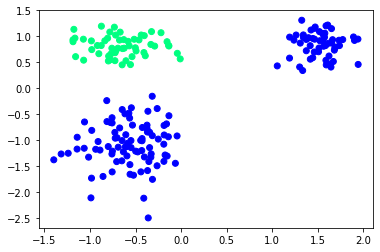

In [32]:
y_sc2 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
sc_clustering = y_sc2.fit(Y_norm)

# Для набора Y проекция на плоскость первой и второй координат

plt.scatter(Y_norm[:,0], Y_norm[:,1], c=sc_clustering.labels_, cmap='winter')

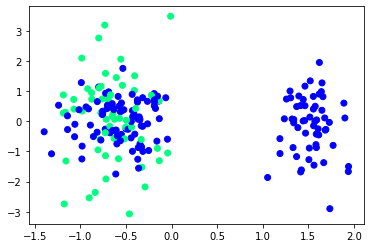

In [33]:
plt.scatter(Y_norm[:,0], Y_norm[:,3], c=sc_clustering.labels_, cmap='winter')

В отличии от k-means и EM-алгоритма, проекция набора данных Y на плоскость с помощью первой и последней координаты дала отличный от вышеупомянутых методов разбиение на кластеры результат

## 1.2 Сравним попарно разбиения, полученные разными методами с помощью RAND индекса 

Вычислим RAND индекс для каждой пары разбиений

In [34]:
from sklearn import metrics
from scipy.special import comb
import sklearn.metrics as metrics

In [35]:
def get_rand_score(clusters, classes):
    tp_plus_fp = comb (np.bincount(clusters), 2).sum()
    tp_plus_fn = comb (np.bincount(classes), 2).sum()
    A = np.c_[(clusters, classes)]
    tp = sum(comb (np.bincount(A[A[:, 0] == i, 1]), 2).sum()
            for i in set (clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    
    return (tp + tn) / (tp+fp+fn+tn)

Для набора X:

In [36]:
print ('k-means and EM-alg: ', metrics.rand_score(x_kmeans2.labels_, x_em2.predict(X_norm)))
print (f'k-means and Spectral Clustering: {metrics.rand_score(x_kmeans2.labels_, x_sc2.labels_):.4f}')
print (f'k-means and MST metod: {metrics.rand_score(x_kmeans2.labels_, MST_x2.labels_):.4f}')
print (f'EM-alg and Spectral Clustering: {metrics.rand_score(x_em2.predict(X_norm), x_sc2.labels_):.4f}')
print (f'EM-alg and MST metod: {metrics.rand_score(x_em2.predict(X_norm), MST_x2.labels_):.4f}')
print ('MST metod and Spectral Clustering: ', metrics.rand_score(MST_x2.labels_, x_sc2.labels_))

k-means and EM-alg:  1.0
k-means and Spectral Clustering: 0.4993
k-means and MST metod: 0.4993
EM-alg and Spectral Clustering: 0.4993
EM-alg and MST metod: 0.4993
MST metod and Spectral Clustering:  1.0


Для набора Y:

In [37]:
print (f'k-means and EM-alg: {metrics.rand_score(y_kmeans2.labels_, y_em2.predict(Y_norm)):.4f}')
print (f'k-means and Spectral Clustering: {metrics.rand_score(y_kmeans2.labels_, y_sc2.labels_):.4f}')
print (f'k-means and MST metod: {metrics.rand_score(y_kmeans2.labels_, MST_y2.labels_):.4f}')
print (f'EM-alg and Spectral Clustering: {metrics.rand_score(y_em2.predict(Y_norm), y_sc2.labels_):.4f}')
print ('EM-alg and MST metod: ', metrics.rand_score(y_em2.predict(Y_norm), MST_y2.labels_))
print (f'MST metod and Spectral Clustering: {metrics.rand_score(MST_y2.labels_, y_sc2.labels_):.4f}')

k-means and EM-alg: 1.0000
k-means and Spectral Clustering: 0.5060
k-means and MST metod: 0.5948
EM-alg and Spectral Clustering: 0.5060
EM-alg and MST metod:  0.5947738693467337
MST metod and Spectral Clustering: 0.5904


## 1.3 Вычислить значение функции модулярности для каждого разбиения на 2 кластера

In [38]:
import networkx.algorithms.community as nx_comm

In [39]:
def clustering_classes_2(labels):
    class_0 = []
    class_1 = []
    classes = []
    
    for i, c in enumerate(labels):
        if c == 0:
            class_0.append(i)
        else:
            class_1.append(i)
    
    classes.append(set(class_0))
    classes.append(set(class_1))
    
    return classes

In [40]:
mx1=nx_comm.modularity(G_X, clustering_classes_2(x_kmeans2.labels_))
mx2=nx_comm.modularity(G_X, clustering_classes_2(x_em2.predict(X_norm)))
mx3=nx_comm.modularity(G_X, clustering_classes_2(MST_x2.fit_predict(X)))
mx4=nx_comm.modularity(G_X, clustering_classes_2(x_sc2.labels_))
print(f'k-means: {mx1:.4f}')
print(f'EM-alg: {mx2:.4f}')
print(f'MST: {mx3:.4f}')
print(f'Spectral Clustering: {mx4:.4f}')

k-means: 0.0034
EM-alg: 0.0034
MST: 0.0041
Spectral Clustering: 0.0041


## Общие выводы по возможности разбиения на 2 кластера каждого набора данных

В наборе Х методы k-means и EM-alg показали одинаковый результат, что не удивительно, потому что у них один принцип работы. Так же MST metod и Spectral Clustering разбили данные одинаково. Для набора Y одинаковое разбиение на кластеры предложили методы k-means, EM-alg и Spectral Clustering. Из за того, что оба набора данных находятся в пространстве R4, визуально разбивать на кластеры их можно только после применения метода PCA.

# 2. Кластеризация для числа кластеров k=3

Произведем разбиение наборов данных X и Y по тем же самым методам, что в предыдущей главе, но на 3 кластера

## k-means

Для набора данных X. Проекция на плоскость первая и последняя координаты.


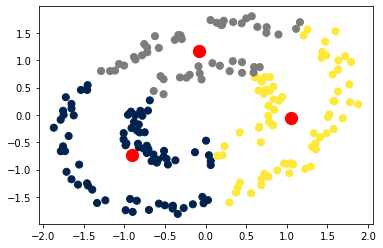

In [41]:
x_kmeans3 = KMeans(n_clusters= 3, init='k-means++')
pred_x3 = x_kmeans3.fit_predict(X_norm)
plt.scatter(X_norm[:,0], X_norm[:,3], c=pred_x3, s=50, cmap='cividis')
plt.scatter(x_kmeans3.cluster_centers_[:, 0], x_kmeans3.cluster_centers_[:, 3], s=150, c='red')
plt.show()

Повторим все тоже самое для набора данных Y. Если взять первую и вторую координату, то на плоскость проекция будет выглядеть следующим образом:

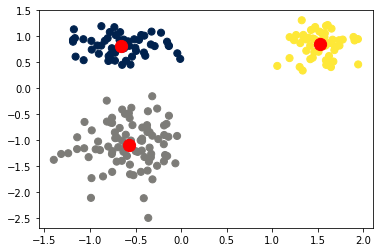

In [42]:
y_kmeans3 = KMeans(n_clusters= 3, init='k-means++')
pred_y3 = y_kmeans3.fit_predict(Y_norm)
plt.scatter(Y_norm[:,0], Y_norm[:,1], c=pred_y3, s=50, cmap='cividis')
plt.scatter(y_kmeans3.cluster_centers_[:, 0], y_kmeans3.cluster_centers_[:, 1], s=150, c='red')
plt.show()

Мы видим, что визуально в этой проекции данные Y разбиваются на 3 кластера лучше, чем на 2

## EM-алгоритм

In [43]:
# Набор данных Х
x_em3 = GaussianMixture(n_components=3)
x_cluster_em = x_em3.fit_predict(X_norm)
pred_x_em3 = x_em3.fit_predict(X_norm)
label_=x_em3
x_em3.means_  # GaussianMixture

array([[ 0.0740285 , -0.49387439,  0.76023519, -1.10165914],
       [ 0.88875441,  1.04858974,  0.3657295 ,  0.75889851],
       [-0.97942881, -0.68001917, -1.00014313,  0.11677493]])

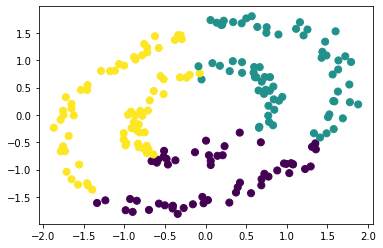

In [44]:
plt.scatter(X_norm[:, 0], X_norm[:, 3], c=pred_x_em3, s=50, cmap='viridis')

In [45]:
# Набор данных Y
y_em3 = GaussianMixture(n_components=3)
y_cluster_em = y_em3.fit_predict(Y_norm)
pred_y_em3 = y_em3.fit_predict(Y_norm)
label_=y_em3
y_em3.means_ # GaussianMixture

array([[-0.57433091, -1.07952522, -1.00754453,  0.02161126],
       [ 1.524559  ,  0.84806324,  1.34366649, -0.13481428],
       [-0.65951918,  0.8139123 ,  0.19763187,  0.10364704]])

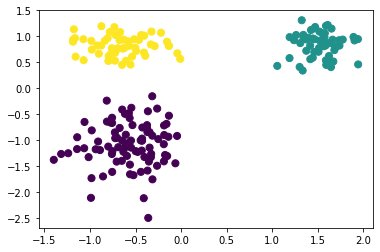

In [46]:
plt.scatter(Y_norm[:, 0], Y_norm[:, 1], c=pred_y_em3, s=50, cmap='viridis')

Проекция на плоскость первой и второй координаты визуально дала отличное разбиение набора данных Y.

## MST metod

Построим граф для 3 кластеров. Для набора данных X коэффициен подбирался вручную и составил 1.13:

In [47]:
from mst_clustering import MSTClustering

def plot_mst(model, cmap='rainbow'):
    """Utility code to visualize a minimum spanning tree"""
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[3], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 3], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree (X)', size=16)
    ax[1].set_title('MST metod (X)', size=16);

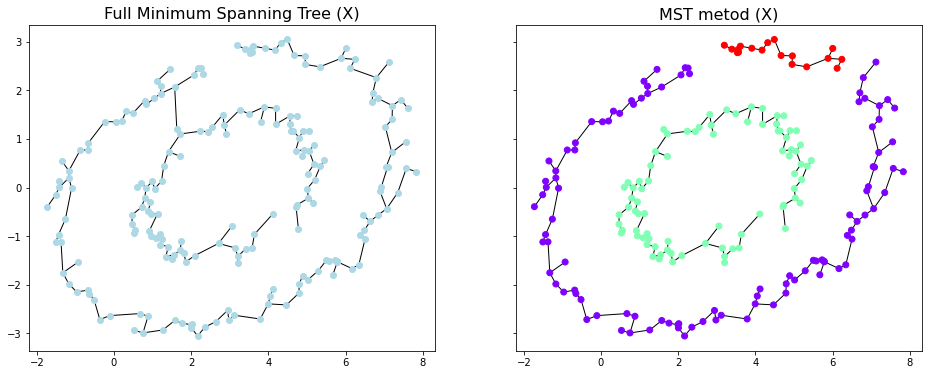

In [48]:
MST_x3 = MSTClustering(cutoff_scale=1.13)
MST_x3.fit(X)
plot_mst(MST_x3)

Для набора Y проекция на плоскость первой и второй координаты. Пороговое значение для разбиения на 3 кластера 1.7 (подбиралось вручную).

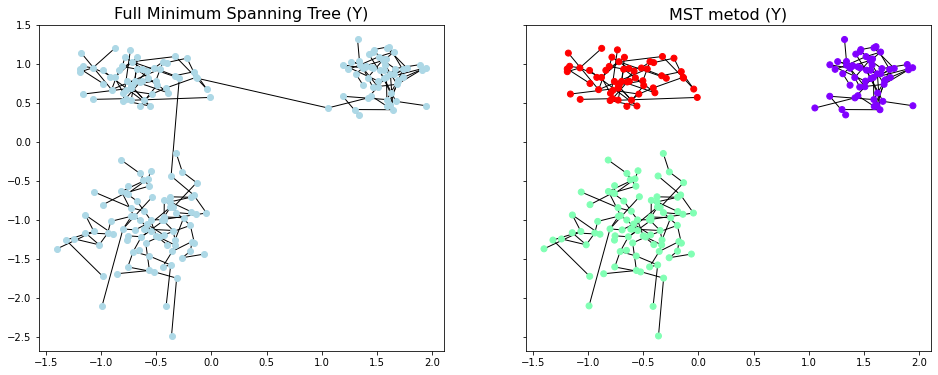

In [49]:
from mst_clustering import MSTClustering

def plot_mst_y3(model, cmap='rainbow'):
    """Utility code to visualize a minimum spanning tree"""
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[1], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree (Y)', size=16)
    ax[1].set_title('MST metod (Y)', size=16);
    
MST_y3 = MSTClustering(cutoff_scale=1.7)
MST_y3.fit(Y_norm)
plot_mst_y3(MST_y3)

## Spectral algorithm

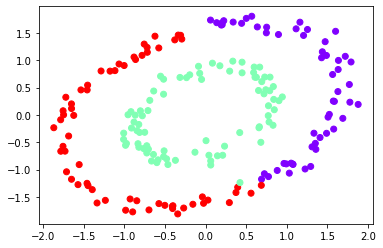

In [50]:
# Для набора Х проекция на плоскость первой и последней координаты

x_sc3 = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
sc_clustering = x_sc3.fit(X_norm)
plt.scatter(X_norm[:,0], X_norm[:,3], c=sc_clustering.labels_, cmap='rainbow')

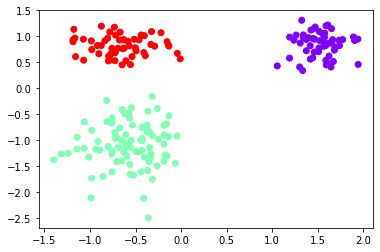

In [51]:
# Для набора Y проекция на плоскость первой и второй координат

y_sc3 = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
sc_clustering = y_sc3.fit(Y_norm)
plt.scatter(Y_norm[:,0], Y_norm[:,1], c=sc_clustering.labels_, cmap='rainbow')

## 2.2 Сравним попарно разбиения, полученные разными методами с помощью RAND индекса 

RAND INDEX для пар разбиений на 3 кластера набора данных Х:

In [52]:
print (f'k-means and EM-alg: {metrics.rand_score(x_kmeans3.labels_, x_em3.predict(X_norm)):.4f}')
print (f'k-means and Spectral Clustering: {metrics.rand_score(x_kmeans3.labels_, x_sc3.labels_):.4f}')
print (f'k-means and MST metod: {metrics.rand_score(x_kmeans3.labels_, MST_x3.labels_):.4f}')
print (f'EM-alg and Spectral Clustering: {metrics.rand_score(x_em3.predict(X_norm), x_sc3.labels_):.4f}')
print (f'EM-alg and MST metod: {metrics.rand_score(x_em3.predict(X_norm), MST_x3.labels_):.4f}')
print (f'MST metod and Spectral Clustering: {metrics.rand_score(MST_x3.labels_, x_sc3.labels_):.4f}')

k-means and EM-alg: 0.6763
k-means and Spectral Clustering: 0.6225
k-means and MST metod: 0.5508
EM-alg and Spectral Clustering: 0.6338
EM-alg and MST metod: 0.5439
MST metod and Spectral Clustering: 0.8381


RAND INDEX для пар разбиений на 3 кластера набора данных Y:

In [53]:
print ('k-means and EM-alg: ', metrics.rand_score(y_kmeans3.labels_, y_em3.predict(Y_norm)))
print ('k-means and Spectral Clustering: ', metrics.rand_score(y_kmeans3.labels_, y_sc3.labels_))
print ('k-means and MST metod: ', metrics.rand_score(y_kmeans3.labels_, MST_y3.labels_))
print ('EM-alg and Spectral Clustering: ', metrics.rand_score(y_em3.predict(Y_norm), y_sc3.labels_))
print ('EM-alg and MST metod: ', metrics.rand_score(y_em3.predict(Y_norm), MST_y3.labels_))
print ('MST metod and Spectral Clustering: ', metrics.rand_score(MST_y3.labels_, y_sc3.labels_))

k-means and EM-alg:  1.0
k-means and Spectral Clustering:  1.0
k-means and MST metod:  1.0
EM-alg and Spectral Clustering:  1.0
EM-alg and MST metod:  1.0
MST metod and Spectral Clustering:  1.0


## 2.3 Вычислить значение функции модулярности для каждого разбиения на 3 кластера

In [54]:
def clustering_classes_3(labels):
    class_0 = []
    class_1 = []
    classes = []
    
    for i, c in enumerate(labels):
        if c == 0:
            class_0.append(i)
        else:
            class_1.append(i)
    
    classes.append(set(class_0))
    classes.append(set(class_1))
    
    return classes

In [55]:
mx13=nx_comm.modularity(G_X, clustering_classes_3(x_kmeans3.labels_))
mx23=nx_comm.modularity(G_X, clustering_classes_3(x_em3.predict(X_norm)))
mx33=nx_comm.modularity(G_X, clustering_classes_3(MST_x3.fit_predict(X)))
mx43=nx_comm.modularity(G_X, clustering_classes_3(x_sc3.labels_))
print(f'k-means: {mx13:.4f}')
print(f'EM-alg: {mx23:.4f}')
print(f'MST: {mx33:.4f}')
print(f'Spectral Clustering: {mx43:.4f}')

k-means: 0.0033
EM-alg: 0.0028
MST: 0.0038
Spectral Clustering: 0.0028


## Общие выводы по возможности разбиения на 3 кластера каждого набора данных

Набор данных Y все методы разбили на 3 кластера одинаково, получив при этом отличный результат. Для набора X все же лучше осуществлять разбиение на 2 кластера.

# 3. Общий случай


Рассмотрим другие способы определения возможного числа кластеров в данных.

## Elbow method
Он известен как "метод локтя". Для начала вычислим сумму квадратов ошибок (SSE) для некоторого значения K.SSE, она определяется как сумма квадратов расстояния между центроидом и каждым членом кластера

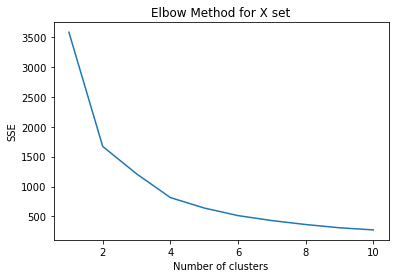

In [56]:
sse_x = []  #сумма квадратов ошибок
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=0)
    kmeans.fit(X)
    sse_x.append(kmeans.inertia_)
plt.plot(range(1, 11), sse_x)
plt.title('Elbow Method for X set')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

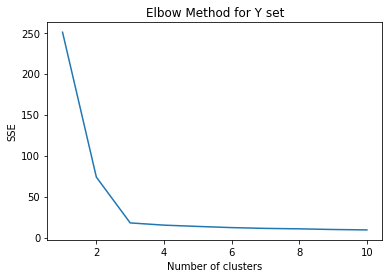

In [57]:
ess_y = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Y)
    ess_y.append(kmeans.inertia_)
plt.plot(range(1, 11), ess_y)
plt.title('Elbow Method for Y set')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Суть метода заключается в том, что наилучшее число разбиения на кластеры находится в месте "изгиба" на графике - того самого "локтя". Анализируя графики, можно сделать вывод, что первый набор данных X лучше всего разбивается на 2 кластера (так же возможно на 4, но хуже), набор данных Y лучше всего разбивается на 3 кластера. В целом метод не очень точный, результаты можно интерпритировать по разному.

## Иерархическая кластеризация 

scipy.cluster.hierarchy.dendrogram

Построим иерархическую кластеризацию в виде дендрограммы. Дендрограмма иллюстрирует, как составляется каждый кластер, рисуя U-образную связь между не одноэлементным кластером и его дочерними элементами. Верхняя часть U-образной ссылки указывает на слияние кластеров. Две ветви U-образной ссылки указывают, какие кластеры были объединены. Длина двух ветвей U-образной ссылки представляет собой расстояние между дочерними кластерами. 

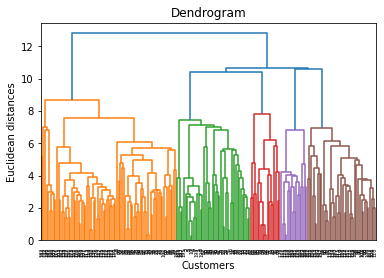

In [58]:
x_dend2 = sch.dendrogram(sch.single(euc_X)) # Основан на алгоритме ближайшей точки
plt.title('Dendrogram') 
plt.xlabel('Customers') 
plt.ylabel('Euclidean distances') 
plt.show()

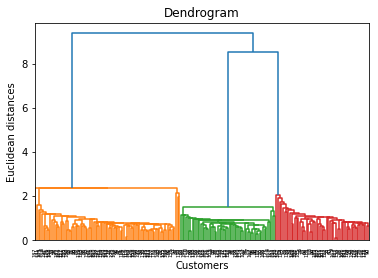

In [59]:
y_dend2 = sch.dendrogram(sch.single(euc_Y))
plt.title('Dendrogram') 
plt.xlabel('Customers') 
plt.ylabel('Euclidean distances') 
plt.show()

Этот метод значительно лучше. Можно сделать вывод, что набор Y однозначно разбивается на 3 кластера. А, например X, даже на 5 кластеров.

## Рассмотрим другой критерий качества кластеризации (отличный от модулярности). Сравним разбиения п.1.1 и п.2.1 по этому критерию


## Коэффициент силуэта 

Определяется для каждого метода и состоит из двух баллов:

a : Среднее расстояние между образцом и всеми другими точками того же кластера.

b : Среднее расстояние между образцом и всеми другими точками в следующем ближайшем кластере.

Тогда коэффициент силуэта S для одного образца определяется как: S = (b-a) / max(a,b)

Преимущества: 
* оценка ограничена от -1 за неправильную кластеризацию до +1 за высокоплотную кластеризацию. Баллы около нуля указывают на перекрывающиеся кластеры
* оценка выше когда кластеры плотные и хорошо разделенные, что относится к стандартной концепции кластера

In [60]:
from sklearn import metrics
sil12 = metrics.silhouette_score(X_norm, x_kmeans2.labels_)
sil22 = metrics.silhouette_score(X_norm, x_em2.predict(X_norm))
sil32 = metrics.silhouette_score(X, MST_x2.fit_predict(X))
sil42 = metrics.silhouette_score(X_norm, x_sc2.labels_)
print('Коээфциент силуэта для набора данных Х, число кластеров = 2')
print(f'k-means: {sil12:.4f}')
print(f'EM-alg: {sil22:.4f}')
print(f'MST: {sil32:.4f}')
print(f'Spectral Clustering: {sil42:.4f}')

Коээфциент силуэта для набора данных Х, число кластеров = 2
k-means: 0.4149
EM-alg: 0.4149
MST: 0.0568
Spectral Clustering: 0.0531


In [61]:
sil12y = metrics.silhouette_score(Y_norm, y_kmeans2.labels_)
sil22y = metrics.silhouette_score(Y_norm, y_em2.predict(Y_norm))
sil32y = metrics.silhouette_score(Y, MST_y2.fit_predict(Y))
sil42y = metrics.silhouette_score(Y_norm, y_sc2.labels_)
print('Коээфциент силуэта для набора данных Y, число кластеров = 2')
print(f'k-means: {sil12y:.4f}')
print(f'EM-alg: {sil22y:.4f}')
print(f'MST: {sil32y:.4f}')
print(f'Spectral Clustering: {sil42y:.4f}')

Коээфциент силуэта для набора данных Y, число кластеров = 2
k-means: 0.4852
EM-alg: 0.4852
MST: 0.7266
Spectral Clustering: 0.2016


In [62]:
sil13 = metrics.silhouette_score(X_norm, x_kmeans3.labels_)
sil23 = metrics.silhouette_score(X_norm, x_em3.predict(X_norm))
sil33 = metrics.silhouette_score(X, MST_x3.fit_predict(X))
sil43 = metrics.silhouette_score(X_norm, x_sc3.labels_)
print('Коээфциент силуэта для набора данных Х, число кластеров = 3')
print(f'k-means: {sil13:.4f}')
print(f'EM-alg: {sil23:.4f}')
print(f'MST: {sil33:.4f}')
print(f'Spectral Clustering: {sil43:.4f}')

Коээфциент силуэта для набора данных Х, число кластеров = 3
k-means: 0.4009
EM-alg: 0.3908
MST: 0.0423
Spectral Clustering: 0.1543


In [63]:
sil13y = metrics.silhouette_score(Y_norm, y_kmeans3.labels_)
sil23y = metrics.silhouette_score(Y_norm, y_em3.predict(Y_norm))
sil33y = metrics.silhouette_score(Y, MST_y3.fit_predict(Y))
sil43y = metrics.silhouette_score(Y_norm, y_sc3.labels_)
print('Коээфциент силуэта для набора данных Y, число кластеров = 3')
print(f'k-means: {sil13y:.4f}')
print(f'EM-alg: {sil23y:.4f}')
print(f'MST: {sil33y:.4f}')
print(f'Spectral Clustering: {sil43y:.4f}')

Коээфциент силуэта для набора данных Y, число кластеров = 3
k-means: 0.5297
EM-alg: 0.5297
MST: 0.7266
Spectral Clustering: 0.5297


По этому методу лучшую оценку получил MST metod для разбиения набора данных Y на 2 и 3 кластера. А худшую тот же MST, но для разбиения X на 3 кластера. В целом все методы справились хорошо. 